In [65]:
#### Loading the packages to be used
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import print_function  # Python 2 and 3
#from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
drugDF= pd.read_csv('drug.csv',dtype={'NDC': str})
drugDF.columns
drugDF.head()

,PRODUCTID_x,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTID_y,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,...,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
0,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",...,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
1,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",0009-3073_48526b2b-3cef-4d67-8c38-d3e9fca1cf3d,HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",...,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
2,0009-3116_deaa2a92-7be0-4a9a-ae39-6297d868d630,Sep-16,0009-3116-01,1 BOTTLE in 1 CARTON (0009-3116-01) > 30 mL i...,0009-3116_deaa2a92-7be0-4a9a-ae39-6297d868d630,HUMAN PRESCRIPTION DRUG,Cleocin T,NaN,clindamycin phosphate,SOLUTION,...,0.17410,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
3,10019-553_9caea3f4-e7e2-4d24-b3b6-5e62f37b3ec8,10019-553,10019-553-01,10 POUCH in 1 BOX (10019-553-01) > 1 PATCH in...,10019-553_9caea3f4-e7e2-4d24-b3b6-5e62f37b3ec8,HUMAN PRESCRIPTION DRUG,Transderm Scop,NaN,Scopalamine,"PATCH, EXTENDED RELEASE",...,20.40381,03/22/2017,EA,C/I,N,"2, 5",B,NaN,NaN,06/07/2017
4,10019-553_9caea3f4-e7e2-4d24-b3b6-5e62f37b3ec8,10019-553,10019-553-01,10 POUCH in 1 BOX (10019-553-01) > 1 PATCH in...,10019-553_b877a694-a1d0-4280-937a-a06820b12a88,HUMAN PRESCRIPTION DRUG,Transderm Scop,NaN,Scopalamine,"PATCH, EXTENDED RELEASE",...,20.40381,03/22/2017,EA,C/I,N,"2, 5",B,NaN,NaN,06/07/2017


In [21]:
# convert date to numeric
pd.to_numeric(drugDF.STARTMARKETINGDATE)

# convert unit price to log unit price
drugDF['log_price']=np.log(drugDF.NADAC_Per_Unit)

In [38]:
#['DOSAGEFORMNAME'] + ['ROUTENAME'] + ['STARTMARKETINGDATE'] + ['MARKETINGCATEGORYNAME']+ ['LABELERNAME']  
#+ ['PHARM_CLASSES'] + ['DEASCHEDULE'] +['OTC']+['NADAC_Per_Unit']+['Classification_for_Rate_Setting']]

# select key features
keyfeatures=(['DOSAGEFORMNAME','ROUTENAME','LABELERNAME','STARTMARKETINGDATE','MARKETINGCATEGORYNAME',
            'PHARM_CLASSES','DEASCHEDULE','OTC','Classification_for_Rate_Setting','log_price'])

drugPrice = drugDF.loc[:,keyfeatures]


In [39]:
# dummify categorical variables

def Dummify(column):
    column_values = pd.get_dummies(drugPrice[column], prefix=column, prefix_sep='__')
    return pd.concat([drugPrice.drop(column,axis=1),column_values],axis=1)

drugPrice = Dummify('DOSAGEFORMNAME')
drugPrice = Dummify('ROUTENAME')
drugPrice = Dummify('LABELERNAME')
drugPrice = Dummify('PHARM_CLASSES')
drugPrice = Dummify('DEASCHEDULE')
drugPrice = Dummify('OTC')
drugPrice = Dummify('Classification_for_Rate_Setting')
drugPrice = Dummify('MARKETINGCATEGORYNAME')

In [40]:
drugPrice.shape

(13102, 1145)

In [41]:
Y = drugPrice.pop('log_price')
X = drugPrice

In [46]:
# test_size 0.1 is the best for linear regression, so we use 0.1 on random forest as well to get a comparison 
X_train,X_test,y_train,y_test = ms.train_test_split(X,Y,test_size=0.1)

#X.iloc[X_train] # return dataframe train
X_train
X_test

,STARTMARKETINGDATE,"DOSAGEFORMNAME__AEROSOL, FOAM","DOSAGEFORMNAME__AEROSOL, METERED","DOSAGEFORMNAME__AEROSOL, POWDER","DOSAGEFORMNAME__AEROSOL, SPRAY",DOSAGEFORMNAME__CAPSULE,"DOSAGEFORMNAME__CAPSULE, COATED PELLETS","DOSAGEFORMNAME__CAPSULE, COATED, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, DELAYED RELEASE","DOSAGEFORMNAME__CAPSULE, DELAYED RELEASE PELLETS",...,Classification_for_Rate_Setting__B-ANDA,Classification_for_Rate_Setting__G,MARKETINGCATEGORYNAME__ANDA,MARKETINGCATEGORYNAME__BLA,MARKETINGCATEGORYNAME__NDA,MARKETINGCATEGORYNAME__NDA AUTHORIZED GENERIC,MARKETINGCATEGORYNAME__OTC MONOGRAPH FINAL,MARKETINGCATEGORYNAME__OTC MONOGRAPH NOT FINAL,MARKETINGCATEGORYNAME__UNAPPROVED DRUG OTHER,MARKETINGCATEGORYNAME__UNAPPROVED OTHER
1623,20130601.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9847,20151008.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,20161201.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
695,19930201.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
6537,20110531.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
117,20120724.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2374,20150527.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
11353,20070612.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
10329,20130301.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
8427,20150315.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [47]:
# to compare with linear model
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))

print("Root Mean Squared error: %.2f"
      % np.sqrt(((ols.predict(X_test) - y_test) ** 2).mean()))
        
# without log 
# Root Mean Squared error: 37.79

# with Log
# R^2 for train set: 0.801368
#--------------------------------------------------
#R^2 for test  set: 0.753213
# Root Mean Squared error: 1.00

R^2 for train set: 0.801368
--------------------------------------------------
R^2 for test  set: 0.753213
Root Mean Squared error: 1.00


In [27]:
# random forest regression
regressor = RandomForestRegressor(n_estimators= 100 , oob_score =True, random_state = 42)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [28]:
# compute error 

#from sklearn.metrics import mean_squared_error
#rms = np.sqrt(mean_squared_error(y_actual, y_predicted))
errorScore=np.sqrt(((y_pred - y_test) ** 2).mean())
print("Root Mean Squared error: %.2f"
      % errorScore)
# error without log: 114.69
# error with log :0.68

Root Mean Squared error: 0.68


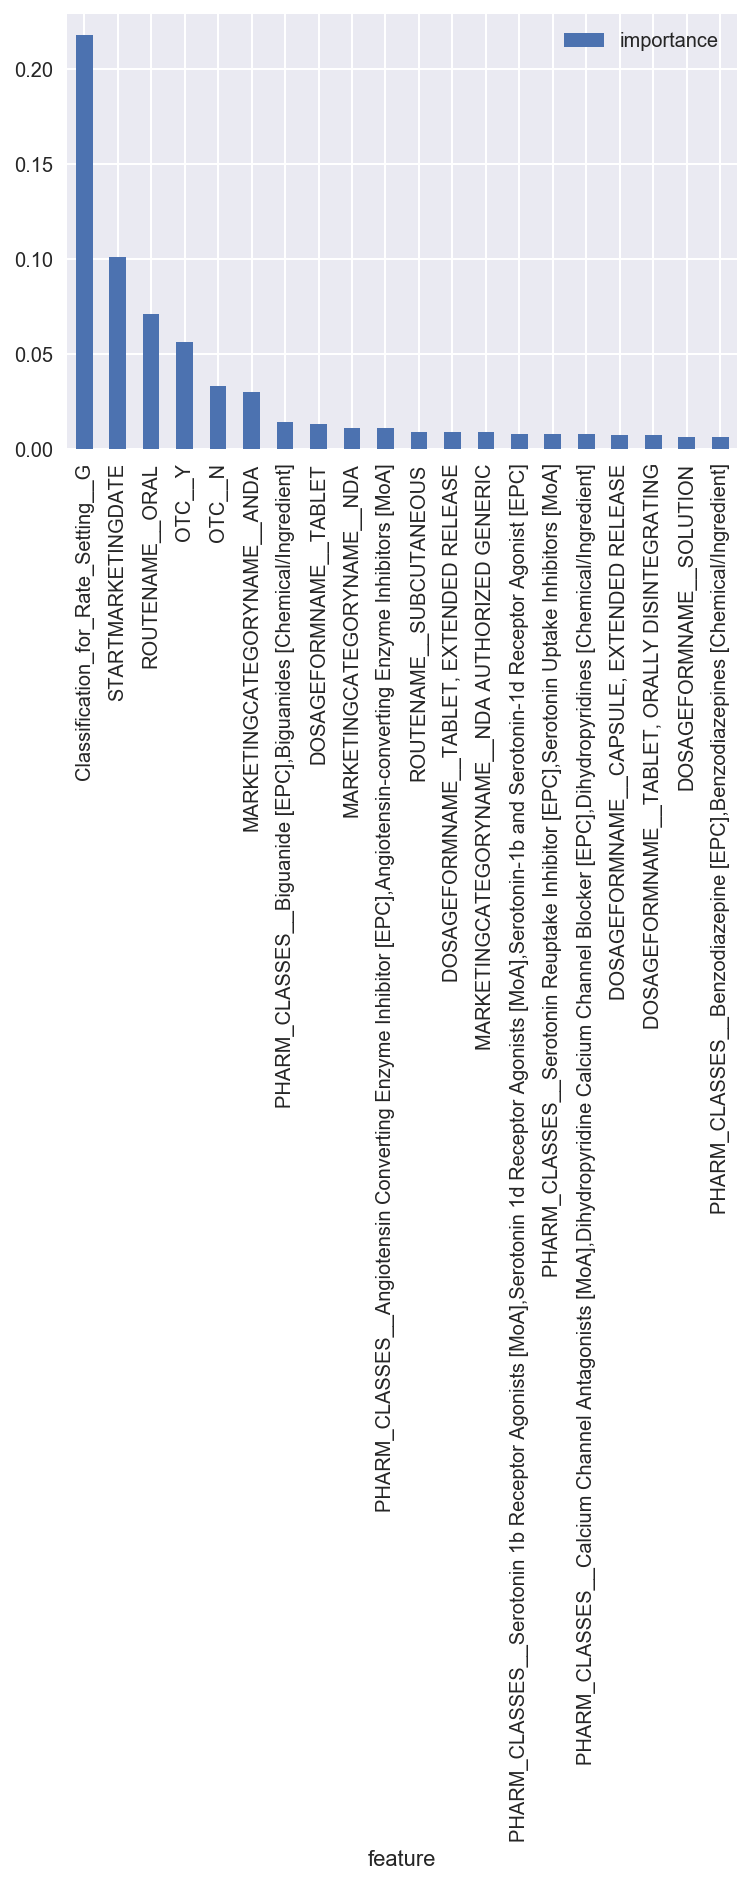

In [97]:
# random forest features importance
rf_importance = regressor.feature_importances_

#show to plot importances
rf_importancesDF = pd.DataFrame({'feature':X.columns,'importance':np.round(rf_importance,3)})
rf_importancesDF = rf_importancesDF.sort_values('importance',ascending=False).set_index('feature')
rf_importancesDF.head(20).plot.bar()

In [70]:
# XGBoost =====================================================
import os
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
# get the selected features
keyfeatures=(['DOSAGEFORMNAME','ROUTENAME','LABELERNAME','STARTMARKETINGDATE','MARKETINGCATEGORYNAME',
            'PHARM_CLASSES','DEASCHEDULE','OTC','Classification_for_Rate_Setting','log_price'])
drug= drugDF.loc[:,keyfeatures]


In [71]:
y = drug["log_price"]
x = drug.ix[:, drug.columns != 'log_price']

In [72]:
# encoding categorical variables to factors
label_encoder = dict()

for feature in (drug.select_dtypes(include=['object']).columns):
    print('encoding feature: {}'.format(feature))
    label_encoder[feature] = LabelEncoder()
    label_encoder[feature].fit(x[feature])
    x.loc[:, feature] = label_encoder[feature].transform(x[feature])


encoding feature: DOSAGEFORMNAME
encoding feature: ROUTENAME
encoding feature: LABELERNAME
encoding feature: MARKETINGCATEGORYNAME
encoding feature: PHARM_CLASSES
encoding feature: DEASCHEDULE
encoding feature: OTC
encoding feature: Classification_for_Rate_Setting


In [73]:
x.shape

(13102, 9)

In [74]:
# 0.2 test size

X_train,X_test,y_train,y_test = ms.train_test_split(x,y,test_size=0.2,random_state=42)
X_test.shape
X_train.shape

(10481, 9)

In [29]:
X_test.head()

,STARTMARKETINGDATE,"DOSAGEFORMNAME__AEROSOL, FOAM","DOSAGEFORMNAME__AEROSOL, METERED","DOSAGEFORMNAME__AEROSOL, POWDER","DOSAGEFORMNAME__AEROSOL, SPRAY",DOSAGEFORMNAME__CAPSULE,"DOSAGEFORMNAME__CAPSULE, COATED PELLETS","DOSAGEFORMNAME__CAPSULE, COATED, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, DELAYED RELEASE","DOSAGEFORMNAME__CAPSULE, DELAYED RELEASE PELLETS",...,Classification_for_Rate_Setting__B-ANDA,Classification_for_Rate_Setting__G,MARKETINGCATEGORYNAME__ANDA,MARKETINGCATEGORYNAME__BLA,MARKETINGCATEGORYNAME__NDA,MARKETINGCATEGORYNAME__NDA AUTHORIZED GENERIC,MARKETINGCATEGORYNAME__OTC MONOGRAPH FINAL,MARKETINGCATEGORYNAME__OTC MONOGRAPH NOT FINAL,MARKETINGCATEGORYNAME__UNAPPROVED DRUG OTHER,MARKETINGCATEGORYNAME__UNAPPROVED OTHER
9737,20111220.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
12399,19880726.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3670,20160426.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
7612,19981224.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5324,20120820.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [75]:
# 0.2 of train size for val data 
size_=int(0.2*len(X_train))
size_

2096

In [76]:
X_train_sub, Y_train_sub = X_train[:-size_],  y_train[:-size_]
X_val, Y_val = X_train[-size_:],  y_train[-size_:]

# check no. of rows and columsn
X_train_sub.shape
Y_train_sub.shape
X_val.shape
Y_val.shape

(2096L,)

In [77]:
model_features=x.columns
model_features

Index([u'DOSAGEFORMNAME', u'ROUTENAME', u'LABELERNAME', u'STARTMARKETINGDATE',
       u'MARKETINGCATEGORYNAME', u'PHARM_CLASSES', u'DEASCHEDULE', u'OTC',
       u'Classification_for_Rate_Setting'],
      dtype='object')

In [78]:
dtrain = xgb.DMatrix(X_train, 
                    y_train,feature_names=model_features)


dtest = xgb.DMatrix(X_test,feature_names=model_features)

dtrain_sub = xgb.DMatrix(X_train_sub, 
                        Y_train_sub, 
                        feature_names=model_features)
d_val = xgb.DMatrix(X_val, 
                    Y_val, 
                    feature_names=model_features)

In [103]:
xgb_params = {
    'eta': 0.07,
    'max_depth': 5,
    'subsample': .8,
    'colsample_bytree': 0.7,
#    'lambda': 1.5, # l2 reg
    'eval_metric': 'rmse',
    
    'objective': 'reg:linear',
    'silent': 0
}

sub_model = xgb.train(xgb_params, 
                      dtrain_sub, 
                      num_boost_round=5000,
                      evals=[(d_val, 'rmse')],
                      early_stopping_rounds=50, 
                      verbose_eval=20)



# Stopping. Best iteration:  [2078]	rmse-rmse:0.729221
# Cross Validation-----------------------------------------------------------------------------
# without log best round : [300] train-rmse:39.3578+11.0549 	test-rmse:118.303+47.7028
# with log best round: [2950]	train-rmse:0.540092+0.00351475	test-rmse:0.793734+0.0133054

[0]	rmse-rmse:2.49578
Will train until rmse-rmse hasn't improved in 50 rounds.
[20]	rmse-rmse:1.47702
[40]	rmse-rmse:1.30907
[60]	rmse-rmse:1.24238
[80]	rmse-rmse:1.18355
[100]	rmse-rmse:1.14508
[120]	rmse-rmse:1.11786
[140]	rmse-rmse:1.09015
[160]	rmse-rmse:1.06853
[180]	rmse-rmse:1.05018
[200]	rmse-rmse:1.03057
[220]	rmse-rmse:1.01653
[240]	rmse-rmse:0.999623
[260]	rmse-rmse:0.983678
[280]	rmse-rmse:0.971017
[300]	rmse-rmse:0.959022
[320]	rmse-rmse:0.950184
[340]	rmse-rmse:0.939878
[360]	rmse-rmse:0.929886
[380]	rmse-rmse:0.920236
[400]	rmse-rmse:0.913747
[420]	rmse-rmse:0.906792
[440]	rmse-rmse:0.900686
[460]	rmse-rmse:0.894141
[480]	rmse-rmse:0.886674
[500]	rmse-rmse:0.880914
[520]	rmse-rmse:0.876006
[540]	rmse-rmse:0.869887
[560]	rmse-rmse:0.863647
[580]	rmse-rmse:0.859151
[600]	rmse-rmse:0.85277
[620]	rmse-rmse:0.846947
[640]	rmse-rmse:0.842619
[660]	rmse-rmse:0.837826
[680]	rmse-rmse:0.83379
[700]	rmse-rmse:0.830679
[720]	rmse-rmse:0.826534
[740]	rmse-rmse:0.822555
[760]	rmse-rm

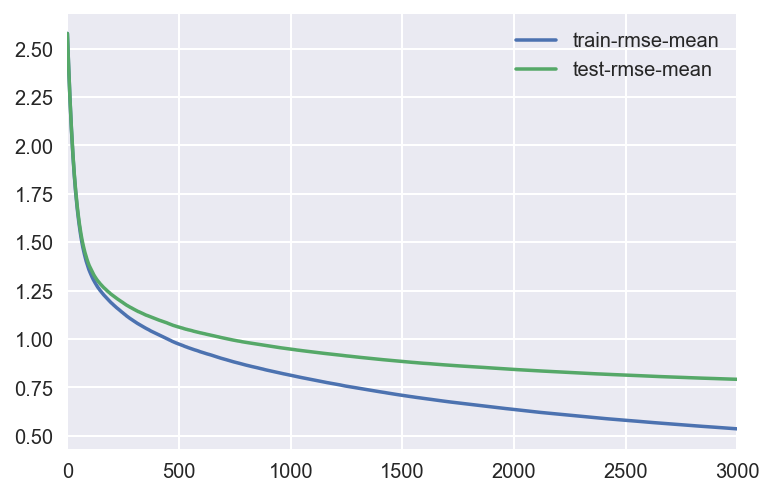

In [80]:
#model[['train-rmse-mean', 'test-rmse-mean']].plot()

In [104]:
full_model = xgb.train(xgb_params,
                       dtrain, 
                       num_boost_round=sub_model.best_iteration,
                       verbose_eval=20)


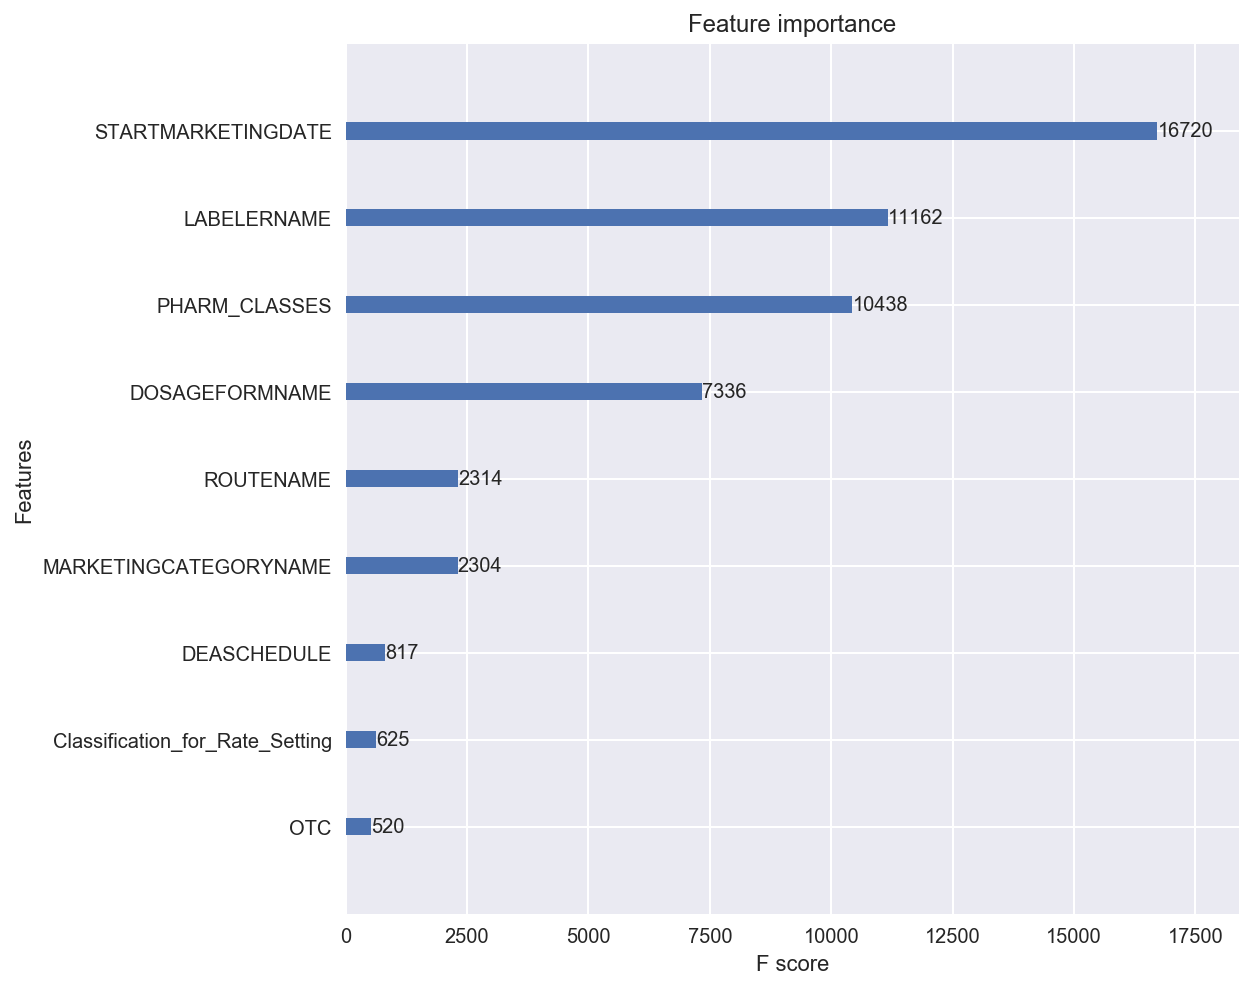

In [107]:
# plot feature importance 
fig, ax = plt.subplots(figsize=(8, 8))
xgb.plot_importance(sub_model,ax=ax)
plt.rcParams.update({'font.size': 10})
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('figure', titlesize=10)  # fontsize of the figure title

In [108]:
# feature importance in table form
pd.DataFrame(sub_model.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)


,feature,importance
1,STARTMARKETINGDATE,16720
8,LABELERNAME,11162
4,PHARM_CLASSES,10438
3,DOSAGEFORMNAME,7336
5,ROUTENAME,2314
7,MARKETINGCATEGORYNAME,2304
0,DEASCHEDULE,817
6,Classification_for_Rate_Setting,625
2,OTC,520


In [109]:
xgb_pred = full_model.predict(dtest)
errorScore=np.sqrt(((xgb_pred - y_test) ** 2).mean())
print("Root Mean Squared error: %.2f"
      % errorScore)

# Root Mean Squared error: 0.68
# Cross Validation-----------------------------
# Without log -Root Mean Squared error: 401.96
# With Log- Root Mean Squared error: 0.75

Root Mean Squared error: 0.68
